In [1]:
#IMPORTS
import numpy as np
import os,sys,math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+"/Code") # so that we can import the modules below
#feel free to have a look into Network, Layer or RBM implementations to see how they work
from NN import Network,Layer,pretrain_autoencoder, plot_results
from RBM import RBM
import math
#DATASETS DIRECTORIES
MNIST_TRAIN_DIR="./Data/MNIST1_train.npz"
MNIST_TEST_1_DIR="./Data/MNIST1_test_1.npz"
MNIST_TEST_2_DIR="./Data/MNIST1_test_2.npz"
PATCHES_DIR="./Data/PATCHES.npy"

In [2]:
#An example how to create,train and use Network structure:
x_mock_data = np.array([[0,0],[0,1],[1,0],[1,1],[1,0]])
y_mock_data = np.array([0,1,1,0,1])[:,None]
print(x_mock_data.shape)
print(y_mock_data.shape)
NN = Network([2,4,1],activations=["sigmoid"]) #define a network architecture & activation
print(NN.get_summary())
NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
NN.fit(x_mock_data,y_mock_data,batch_size=3, #fit to data
       epochs=2000,x_val=x_mock_data,y_true_val=y_mock_data) 
print("\n Targets:")
print((y_mock_data))
print("\n Predictions:")
print(NN.predict(x_mock_data)) # get predictions
print("\n Error:")
print(NN.evaluate(x_mock_data,y_mock_data)) # get error

(5, 2)
(5, 1)
0: Input	 in:(None, 2)	 out:(None, 2)
1: Dense	 in:(None, 2)	 out:(None, 4)
2: Sigmoid	 in:(None, 4)	 out:(None, 4)
3: Dense	 in:(None, 4)	 out:(None, 1)
4: Sigmoid	 in:(None, 1)	 out:(None, 1)
None
2000:	 train err: 0.0028	 val err: 0.00335	 patience: 0																															
 Targets:
[[0]
 [1]
 [1]
 [0]
 [1]]

 Predictions:
[[0.06922553]
 [0.93490328]
 [0.95636077]
 [0.06249475]
 [0.95636077]]

 Error:
[0.00334882]


### Load Mnist Dataset

In [2]:
#load the MNIST dataset
#train dataset for A1,A2,A3,A8,A9
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]

#test dataset for A1,A2,A3
x_test =  np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_0"]
y_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_1"]

#test dataset for A8,A9
x_test_2 =  np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_0"]
y_test_2 = np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_1"]

#validation split
#create some validation data
#train_fraction = 0.8
#split_point = int(train_fraction *len(X)) 
X1 = X[0:2249,:]
x1_valid = X[2250:2999,:]

## Part 1. Data Compression

### <span style="color:red">=========== Assignment 1 ===========</span>

150:	 train err: 0.01959	 val err: 0.02411	 patience: 4	

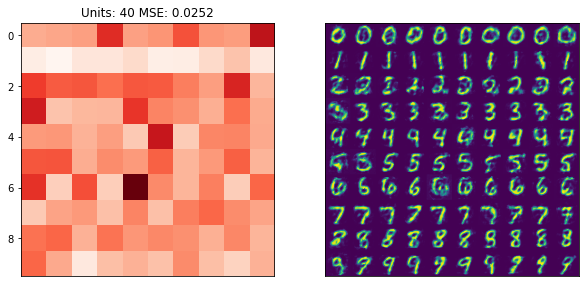

150:	 train err: 0.0098	 val err: 0.0152	 patience: 0	0		

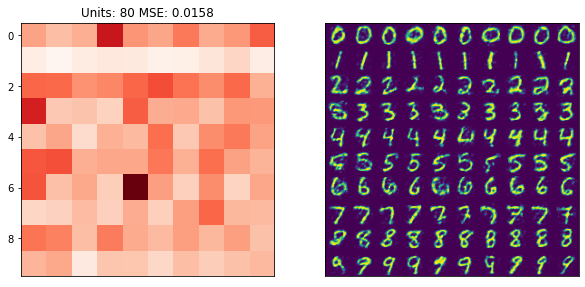

150:	 train err: 0.00361	 val err: 0.00836	 patience: 1		

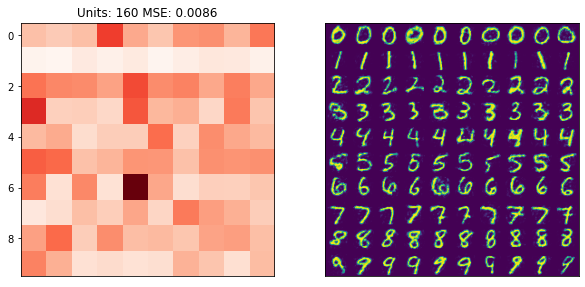

150:	 train err: 0.00181	 val err: 0.00489	 patience: 0	

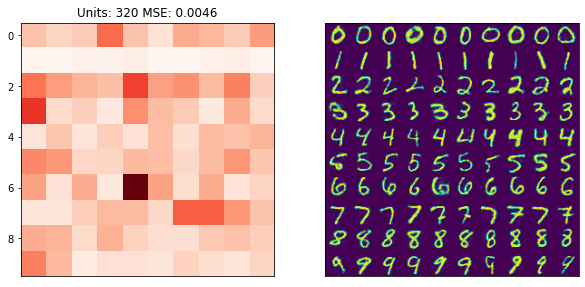

In [26]:
#Create a NN, tie its weights using the function:
#Network.tie_weights(layer_index_1,layer_index_2)
#Remember to do this before calling fit()!
#To visualize the results, use:
#plot_results(Network,data,hidden_units)
#Remember to record your results for A4!
AS1=[]
hidden_arch = [40,80,160,320]
for i in hidden_arch:
    NN = Network([784,i,784],activations=["sigmoid"])
    NN.set_lr(1.0,momentum=0.0)
    NN.tie_layer_weights(1,3)
    NN.fit(X1,X1,batch_size=100,epochs=150,x_val=x1_valid,y_true_val=x1_valid,patience=25)
    AS1.append(math.log((plot_results(NN,x_test,i))))

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

135:	 train err: 0.02084	 val err: 0.02758	 patience: 25	
 Patience condition reached,best validation performance: 0.026346156288415325


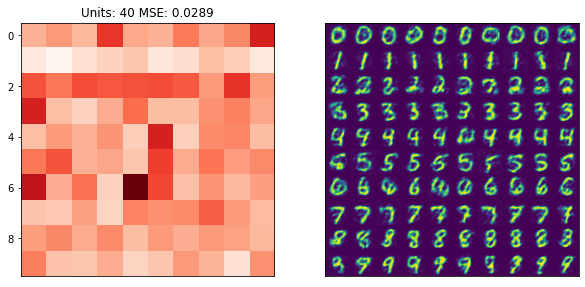

133:	 train err: 0.01235	 val err: 0.01743	 patience: 25	
 Patience condition reached,best validation performance: 0.017021452460119144


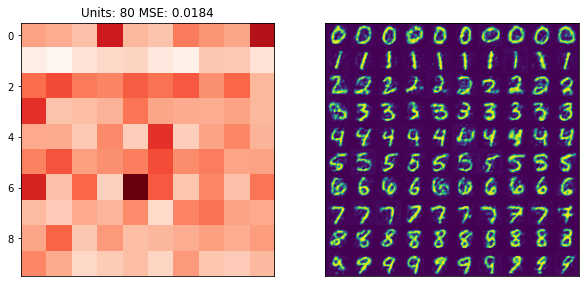

150:	 train err: 0.00656	 val err: 0.00927	 patience: 2	

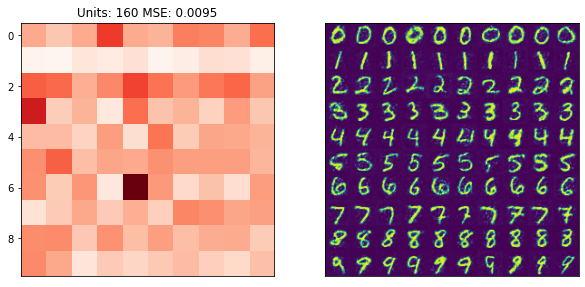

150:	 train err: 0.00443	 val err: 0.0057	 patience: 1		

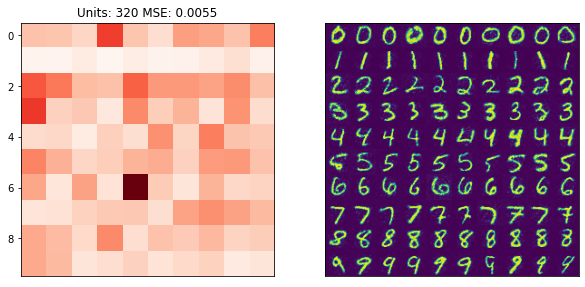

In [27]:
#Train a DAE
#add gaussian noise to data 
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the training dataset (2249,784) 
noise = np.random.normal(mu, sigma, X1.shape) 
X2=X1+noise
for i in range(2249):
    for j in range(784):
          if X2[i][j]>1.0:
                X2[i][j]=1.0
          elif X2[i][j]<0.0:
                X2[i][j]=0.0
AS2=[]
hidden_arch = [40,80,160,320]
for i in hidden_arch:
     NN = Network([784,i,784],activations=["sigmoid"]) #define a network architecture & activation
     NN.tie_layer_weights(1,3)
     NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
     NN.fit(X2,X2,batch_size=100, #fit to data
       epochs=150,x_val=x1_valid,y_true_val=x1_valid,patience=25) 
     AS2.append(math.log((plot_results(NN,x_test,i))))

### <span style="color:red">=========== End of Assignment 2 ===========</span>

### <span style="color:red">=========== Assignment 3 ===========</span>

170:	 train err: 0.04206	 val err: 0.04338	 patience: 25	
 Patience condition reached,best validation performance: 0.04295830563939825


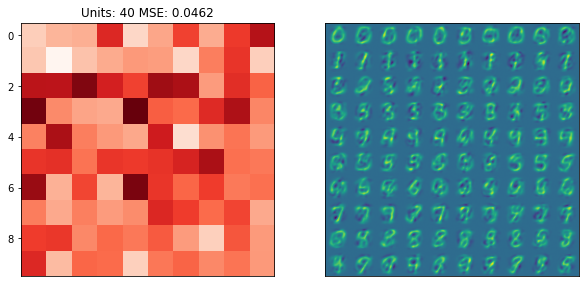

100:	 train err: 0.04362	 val err: 0.04544	 patience: 25	
 Patience condition reached,best validation performance: 0.044435042213370024


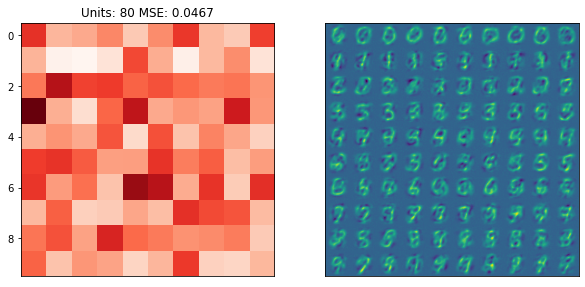

77:	 train err: 0.04597	 val err: 0.04791	 patience: 25	
 Patience condition reached,best validation performance: 0.04648515496020544


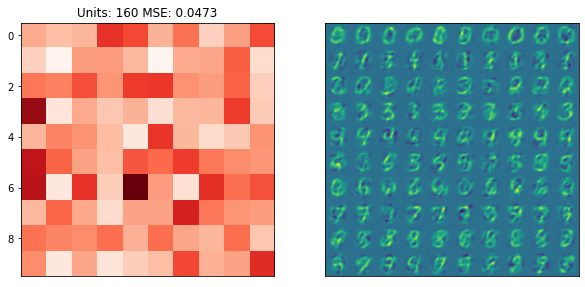

63:	 train err: 0.05009	 val err: 0.05154	 patience: 25	
 Patience condition reached,best validation performance: 0.05039914196846296


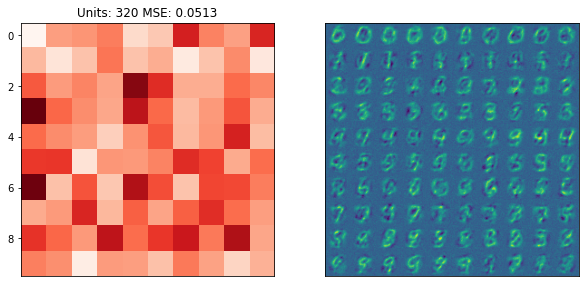

In [28]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units
AS3=[]
X1 = X[0:2249,:]
x1_valid = X[2250:2999,:]
for i in hidden_arch:
    rbm= RBM(784,i, use_gaussian_visible_sampling=True
                , use_gaussian_hidden_sampling=False
                , use_sample_vis_for_learning=False)
    rbm.set_lr(0.01,0.0,momentum=0.5)
    rbm.fit(X1,x1_valid,batch_size=100,epochs=1500,patience=25)
    AS3.append(math.log((plot_results(rbm,x_test,i))))    

150:	 train err: 0.00177	 val err: 0.00483	 patience: 3	(100, 784)


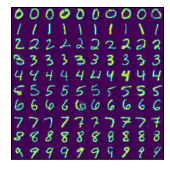

In [31]:
'''
The best performance was shown by traditional AE with 320 hidden units with a MSE of 0.0046.
'''

NN = Network([784,320,784],activations=["sigmoid"]) #define a network architecture & activation
NN.tie_layer_weights(1,3)
NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
NN.fit(X1,X1,batch_size=100, #fit to data
           epochs=150,x_val=x1_valid,y_true_val=x1_valid,patience=25) 
reco =NN.predict(x_test)
print(reco.shape)
reco=reco.reshape(reco.shape[0],28,28)

ax = plt.subplot(122)
digits = np.zeros((10*28,10*28))
for i in range(100):
    digits[28*(i//10):28*(i//10)+28,28*(i%10):28*(i%10)+28]=np.reshape(reco[i],newshape=(28,28))
f = ax.imshow(digits)
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)
plt.show()      

### <span style="color:red">=========== Assignment 4 ===========</span>

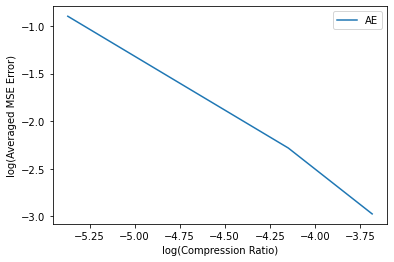

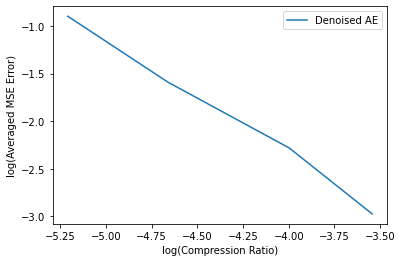

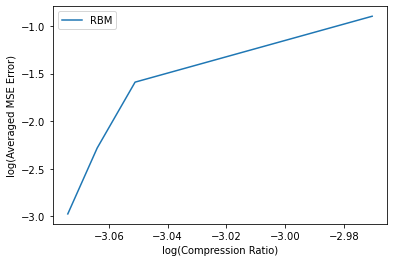

In [32]:
#Create a plot comparing compression power of different AE
import math
y1=math.log(40/784)
y2=math.log(80/784)
y3=math.log(160/784)
y4=math.log(320/784)
    
y=[y1,y2,y3,y4]    
plot=plt.figure(1)
plt.plot(AS1, y, label='AE')
plt.xlabel('log(Compression Ratio)')
plt.ylabel('log(Averaged MSE Error)')
plt.legend()
plt.show()
plot=plt.figure(2)
plt.plot(AS2, y, label='Denoised AE')
plt.xlabel('log(Compression Ratio)')
plt.ylabel('log(Averaged MSE Error)')
plt.legend()
plt.show()
plot=plt.figure(3)
plt.plot(AS3, y, label='RBM')
plt.xlabel('log(Compression Ratio)')
plt.ylabel('log(Averaged MSE Error)')
plt.legend()
plt.show()
'''
Looking at the graphs, the traditional autoencoder performs the best, while rbm performs the worst in my case.
'''


### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

[Answer] I have observerd that I can improve the RBM by setting gaussian hidden sampling to true and keeping, gaussian visible sampling and sample vis for learning, to false.

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 2. Spatial Filer Learning

### <span style="color:red">=========== Assignment 6 ===========</span>

In [2]:
#Complete the for loop from the display_filters function that visualizes the NN weights.
#To access any Network weights, use the following syntax: 
#Network.layers[layer_index].w
def display_mean_activation(nn,x,n_units=50):
    """
    Plots a scatter plot of mean activation of the first n_units neurons of the first hidden layer.
    nn - a Network class object
    x - data on which to measure the mean activation
    n_units - how many activations are meant to be displayed
    """
    plt.figure(figsize=(5,5))
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    plt.scatter(np.arange(n_units),mean_activations)
    plt.xlim(int(-n_units/10),int(n_units+n_units/6))
    plt.xlabel("Hidden units")
    plt.ylabel("Mean activation")
    plt.show()

def display_filters(nn):
    """
    Complete a function that visualizes the weights inside
    the second hidden layer of the nn in a 10x10 grid.
    Use the plt.subplot() to create 100 subplots.
    nn - a Network class object
    """
    
    
    W=nn.layers[1].w
    W=W.T
    W=W.reshape(W.shape[0],8,8)
    fig=plt.figure(5,figsize=(7,7))
    for i in range(100):
        #COMPLETE BELOW, IT CAN TAKE MORE OR LESS LINES THAN 3
        plt.subplot(10,10,i+1)
        plt.imshow(W[i],cmap='bwr')
        plt.axis=('off')    
    plt.show()
        

In [3]:
#Load and preprocess the dataset
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
for i in range(0,100000):
    maxpatch=X_patches[i].max()
    for j in range(0,8):
        for k in range(0,8):
            X_patches[i][j][k]=X_patches[i][j][k]/maxpatch
X_patches=X_patches.reshape(X_patches.shape[0],64)
x_val=X_patches[0:24999,:]
X_patches=X_patches[25000:99999,:]
#Here, you have to preprocess the dataset

60:	 train err: 0.0003	 val err: 0.00033	 patience: 0		

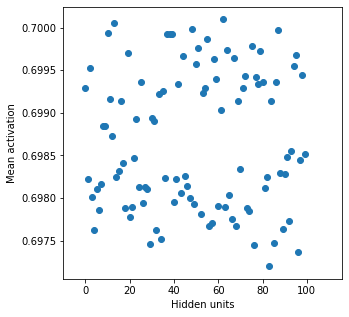

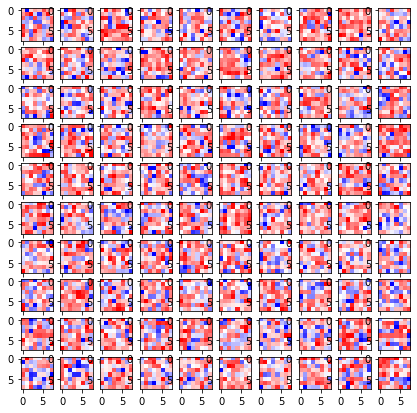

60:	 train err: 0.00116	 val err: 0.00124	 patience: 0	

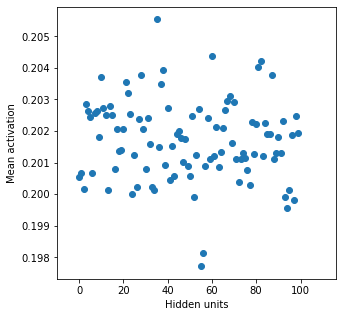

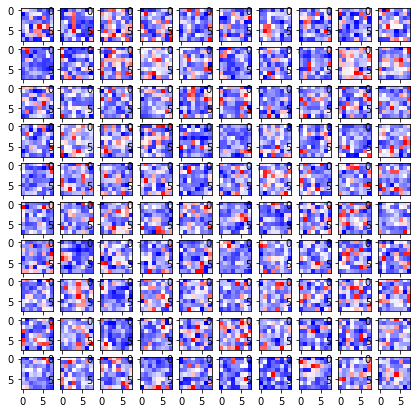

60:	 train err: 0.03449	 val err: 0.03498	 patience: 0	

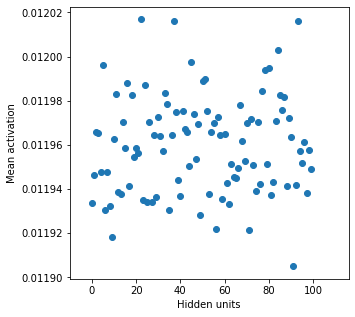

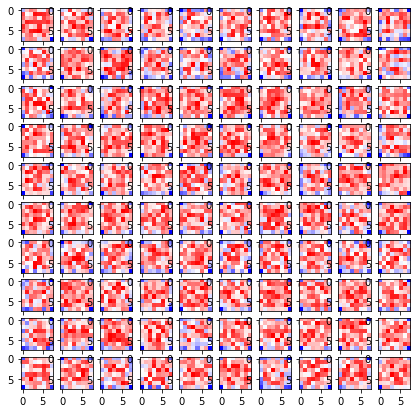

In [9]:
#Do some hyperparameter search for lambda and rho here.
# To enable sparsity, use:
# Network.layers[activation_layer_id].enable sparsity(lambda,rho)
#Use Network.get_summary() to print network layers' summary
#Use display_mean_activation and display_filters to visualize your results
NN = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
NN.set_lr(1.0,momentum=0.5)  #set learning rate and momentum
NN.layers[2].enable_sparsity(0.01,0.7)
NN.fit(X_patches,X_patches,batch_size=500, #fit to data
           epochs=60,x_val=x_val,y_true_val=x_val,patience=10) 
display_mean_activation(NN,X_patches,100)
display_filters(NN)

NN = Network([64,100,64],activations=["sigmoid"])
NN.set_lr(1.0,momentum=0.5)
NN.layers[2].enable_sparsity(0.1,0.201)
NN.fit(X_patches,X_patches,batch_size=500, #fit to data
           epochs=60,x_val=x_val,y_true_val=x_val,patience=10) 
display_mean_activation(NN,X_patches,100)
display_filters(NN)

NN = Network([64,100,64],activations=["sigmoid"])
NN.set_lr(1.0,momentum=0.5)
NN.layers[2].enable_sparsity(0.3,0.012)
NN.fit(X_patches,X_patches,batch_size=500, #fit to data
           epochs=60,x_val=x_val,y_true_val=x_val,patience=10) 
display_mean_activation(NN,X_patches,100)
display_filters(NN)


In [ ]:
'''
The best learned spatial filter corresponds to the lambda and rho value 0.1 and 0.201 according to my results. This is because 
in the graph(2nd set of graphs) for these values, most number of mean activations have value close to the rho value i.e 0.201 as 
compared to that of other two graphs. 
'''

### <span style="color:red">=========== End of Assignment 6 ===========</span>

### <span style="color:red">=========== Assignment 7 ===========</span>

0: Input	 in:(None, 64)	 out:(None, 64)
1: Dense	 in:(None, 64)	 out:(None, 100)
2: Sigmoid	 in:(None, 100)	 out:(None, 100)
3: Dense	 in:(None, 100)	 out:(None, 64)
4: Sigmoid	 in:(None, 64)	 out:(None, 64)
None
60:	 train err: 0.00024	 val err: 0.00028	 patience: 0	

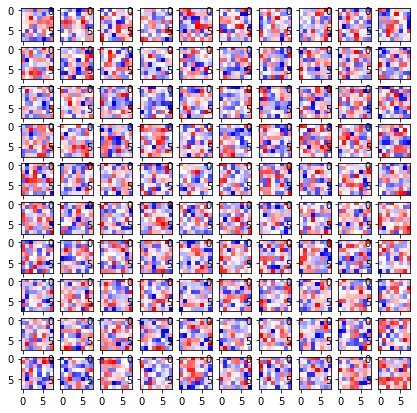

In [16]:
#Produce some results for network without sparsity constraint.
NN = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
print(NN.get_summary())
NN.set_lr(1.0,momentum=0.5)  #set learning rate and momentum
NN.fit(X_patches,X_patches,batch_size=500, #fit to data
           epochs=60,x_val=x_val,y_true_val=x_val,patience=10) 
display_filters(NN)

### <span style="color:red">=========== End of Assignment 7 ===========</span>

## Part 3. Visualization

### <span style="color:red">=========== Assignment 8 ===========</span>

In [3]:
# Define the network architecture and use the pretrain_autoencoder function to pretrain it.
NN = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid","sigmoid","sigmoid","linear",
                                                              "sigmoid","sigmoid","sigmoid","sigmoid"])
print(NN.get_summary())
X2=X[0:2399,:]
x2_valid=X[2400:2999,:]
used_rbms_big= pretrain_autoencoder(NN, X2, x2_valid, rbm_lr=0.1, rbm_use_gauss_visible=False,
                                    rbm_use_gauss_hidden=False, rbm_mom=0.5, rbm_weight_decay=0.0, rbm_lr_decay=0.0,
                                    rbm_batch_size=100, rbm_epochs=500,rbm_patience=25)


0: Input	 in:(None, 784)	 out:(None, 784)
1: Dense	 in:(None, 784)	 out:(None, 500)
2: Sigmoid	 in:(None, 500)	 out:(None, 500)
3: Dense	 in:(None, 500)	 out:(None, 500)
4: Sigmoid	 in:(None, 500)	 out:(None, 500)
5: Dense	 in:(None, 500)	 out:(None, 250)
6: Sigmoid	 in:(None, 250)	 out:(None, 250)
7: Dense	 in:(None, 250)	 out:(None, 2)
8: Linear	 in:(None, 2)	 out:(None, 2)
9: Dense	 in:(None, 2)	 out:(None, 250)
10: Sigmoid	 in:(None, 250)	 out:(None, 250)
11: Dense	 in:(None, 250)	 out:(None, 500)
12: Sigmoid	 in:(None, 500)	 out:(None, 500)
13: Dense	 in:(None, 500)	 out:(None, 500)
14: Sigmoid	 in:(None, 500)	 out:(None, 500)
15: Dense	 in:(None, 500)	 out:(None, 784)
16: Sigmoid	 in:(None, 784)	 out:(None, 784)
None

Fine tuning layer number 0
185:	 train err: 0.00662	 val err: 0.01039	 patience: 25	
 Patience condition reached,best validation performance: 0.01027130564347383

Fine tuning layer number 1
253:	 train err: 0.01144	 val err: 0.016	 patience: 25	4	
 Patience conditio

In [4]:
# Fine-tune the pre-trained autoencoder. You can also use the plot_results function from A1
# to visualize the reconstructions before and after fine-tuning
NN.set_lr(0.4,momentum=0.5)
NN.tie_layer_weights(1,15)
NN.tie_layer_weights(3,13)
NN.tie_layer_weights(5,11)
NN.tie_layer_weights(7,9)
NN.fit(X2,X2,batch_size=100, #fit to data
      epochs=500,x_val=x2_valid,y_true_val=x2_valid,patience=25) 
train_err=[]
val_err=[]
train_err=NN.train_err_hist
val_err=NN.val_err_hist


26:	 train err: 0.04887	 val err: 0.05181	 patience: 1	

C:\Users\Aryaan/Code\NN.py:81: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-x))
C:\Users\Aryaan/Code\NN.py:86: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-self.saved_x))


152:	 train err: 0.04815	 val err: 0.04894	 patience: 25	
 Patience condition reached,best validation performance: 0.04733572293651708


In [ ]:
'''
For my held out validation, I used 600 datasets for validation i.e an 80:20 split between training and validation data.
For my hyperparameter investigation, I investigated lr between the values 0.1 to 1 with an increment of 0.1. 
The minimum averaged reconstruction error was the lowest at lr=0.4 and its value was 0.04774.
'''

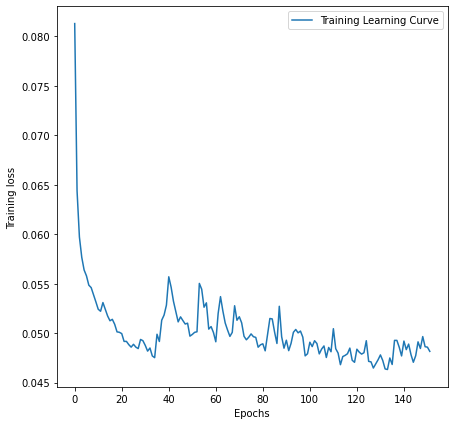

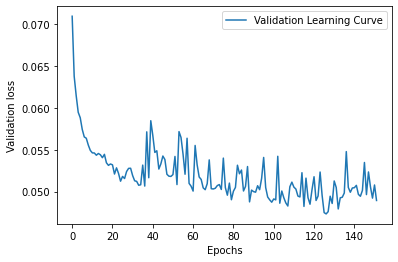

In [6]:
#Plotting training and validation learning curve
plt.figure(6,figsize=(7,7))
epoch=[]
for i in range(152):
    epoch.append(i)
#Training learning curve
plt.plot(epoch,train_err,label="Training Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.legend()
plt.show()
#Validation learning curve
plt.plot(epoch,val_err,label="Validation Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

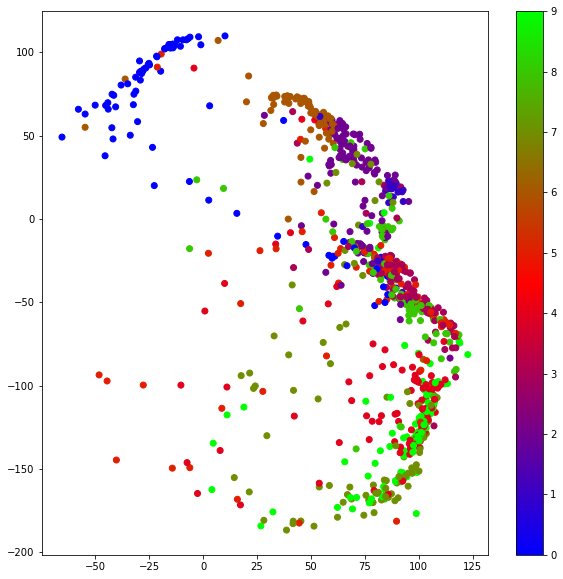

In [7]:
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!
#plt.figure(figsize=(7,7))
reco=NN.get_layer_output(x_test_2,7)
plt.figure(7,figsize=(10, 10))
plt.scatter(reco[:, 0], reco[:, 1], c=y_test_2,cmap='brg')
plt.colorbar()
plt.show()

### <span style="color:red">=========== End of Assignment 8 ===========</span>

### <span style="color:red">=========== Assignment 9 ===========</span>

In [3]:
#Create and train another network, this time without pretraining.
#You can use the plot_results function to see the results.
NN = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid","sigmoid","sigmoid","linear","sigmoid","sigmoid","sigmoid","sigmoid"])
print(NN.get_summary())
X2=X[0:2399,:]
x2_valid=X[2400:2999,:]

0: Input	 in:(None, 784)	 out:(None, 784)
1: Dense	 in:(None, 784)	 out:(None, 500)
2: Sigmoid	 in:(None, 500)	 out:(None, 500)
3: Dense	 in:(None, 500)	 out:(None, 500)
4: Sigmoid	 in:(None, 500)	 out:(None, 500)
5: Dense	 in:(None, 500)	 out:(None, 250)
6: Sigmoid	 in:(None, 250)	 out:(None, 250)
7: Dense	 in:(None, 250)	 out:(None, 2)
8: Linear	 in:(None, 2)	 out:(None, 2)
9: Dense	 in:(None, 2)	 out:(None, 250)
10: Sigmoid	 in:(None, 250)	 out:(None, 250)
11: Dense	 in:(None, 250)	 out:(None, 500)
12: Sigmoid	 in:(None, 500)	 out:(None, 500)
13: Dense	 in:(None, 500)	 out:(None, 500)
14: Sigmoid	 in:(None, 500)	 out:(None, 500)
15: Dense	 in:(None, 500)	 out:(None, 784)
16: Sigmoid	 in:(None, 784)	 out:(None, 784)
None


In [4]:

NN.set_lr(0.2,momentum=0.5)
NN.fit(X2,X2,batch_size=100, #fit to data
      epochs=500,x_val=x2_valid,y_true_val=x2_valid,patience=25) 
train_err=[]
val_err=[]
train_err=NN.train_err_hist
val_err=NN.val_err_hist

420:	 train err: 0.03805	 val err: 0.04065	 patience: 25	
 Patience condition reached,best validation performance: 0.0405651321726481


In [ ]:
'''
For my held out validation, I used 600 datasets for validation i.e an 80:20 split between training and validation data.
For my hyperparameter investigation, I investigated lr between the values 0.1 to 1 with an increment of 0.1. 
The minimum averaged reconstruction error was the lowest at lr=0.2 and its value was 0.04056.
'''

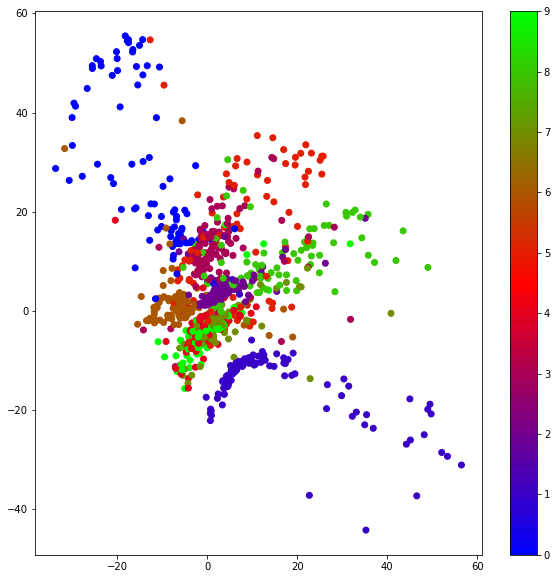

In [7]:
#Plot 2D representations for the new network.
reco=NN.get_layer_output(x_test_2,7)
plt.figure(9,figsize=(10, 10))
plt.scatter(reco[:, 0], reco[:, 1], c=y_test_2,cmap='brg')
plt.colorbar()
plt.show()

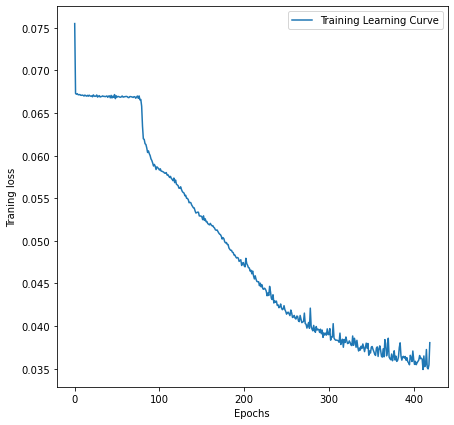

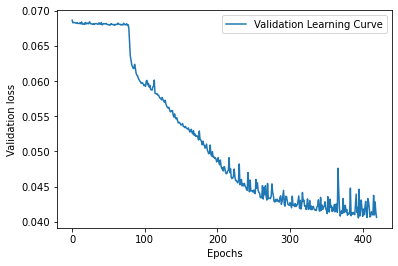

In [8]:
#Create a plot of training metrics.
plt.figure(8,figsize=(7,7))
epoch=[]
for i in range(420):
    epoch.append(i)
#Training learning curve
plt.plot(epoch,train_err,label="Training Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Traning loss")
plt.legend()
plt.show()
#Validation Learning curve
plt.plot(epoch,val_err,label="Validation Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

### <span style="color:red">=========== End of Assignment 9 ===========</span>